## Calculation of Coverage

In [2]:
input_dir = '/ds/images/AI4EO/EnhancedS2Agriculture/preprocessed/train'
input_dir = '/ds/images/AI4EO/EnhancedS2Agriculture/preprocessed/train'

In [ ]:
from src.coverage_analysis.dataset_coverage_analysis import analyse_dataset

strategy= 'by_classes' #'by_classes' #'by_clouds'
idx_targets = [4,5] #[8,9,3]
min_spatial_coverage=50
min_temporal_coverage=50      
boundary_mask=None
results = analyse_dataset(input_dir = input_dir, idx_targets = idx_targets, boundary_mask = boundary_mask,
                            strategy = strategy, min_spatial_coverage = min_spatial_coverage, 
                            min_temporal_coverage = min_temporal_coverage)

## Plots

In [1]:
input_dir = './coverage/ai4eo/'

In [2]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
import pandas as pd
from src.utils.plots import plot_coverage_perc

df_stats = pd.read_csv(f"{input_dir}/assesment_report_veg_70_70.csv", index_col=0)
df_stats.head()

,num_timesteps,num_timesteps_missing,avg_spatial_coverage,num_timesteps_abovecov,temporal_coverage,assesment_temporal,assesment_spatial
filename,,,,,,,
eopatch-841,38,38,81.870695,30,78.947368,high,high
eopatch-781,38,38,79.898147,31,81.578947,high,high
eopatch-718,38,38,82.290063,30,78.947368,high,high
eopatch-804,38,38,78.409095,28,73.684211,high,high
eopatch-903,38,38,73.205095,23,60.526316,low,high


In [3]:
#low coverage fields based on spatial assessment
df_stats[df_stats["assesment_spatial"] == "low"]

,num_timesteps,num_timesteps_missing,avg_spatial_coverage,num_timesteps_abovecov,temporal_coverage,assesment_temporal,assesment_spatial
filename,,,,,,,
eopatch-523,48,48,55.044258,18,37.500000,low,low
eopatch-914,46,46,60.183722,25,54.347826,low,low
eopatch-916,46,46,64.100800,28,60.869565,low,low
eopatch-915,46,46,61.192104,24,52.173913,low,low
eopatch-652,38,38,61.207737,18,47.368421,low,low


In [4]:
#low coverage fields based on temporal assessment
df_stats[df_stats["assesment_temporal"] == "low"]

,num_timesteps,num_timesteps_missing,avg_spatial_coverage,num_timesteps_abovecov,temporal_coverage,assesment_temporal,assesment_spatial
filename,,,,,,,
eopatch-903,38,38,73.205095,23,60.526316,low,high
eopatch-852,38,38,76.913137,26,68.421053,low,high
eopatch-523,48,48,55.044258,18,37.500000,low,low
eopatch-904,38,38,74.929095,26,68.421053,low,high
eopatch-835,38,38,74.360800,26,68.421053,low,high
eopatch-894,38,38,73.374442,24,63.157895,low,high
eopatch-870,38,38,78.625389,26,68.421053,low,high
eopatch-914,46,46,60.183722,25,54.347826,low,low
eopatch-893,38,38,73.621137,25,65.789474,low,high


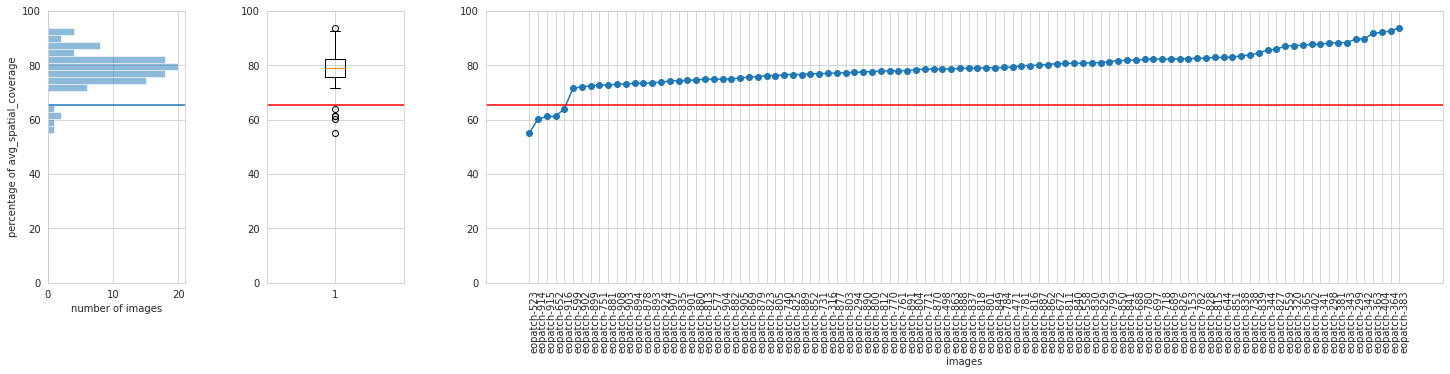

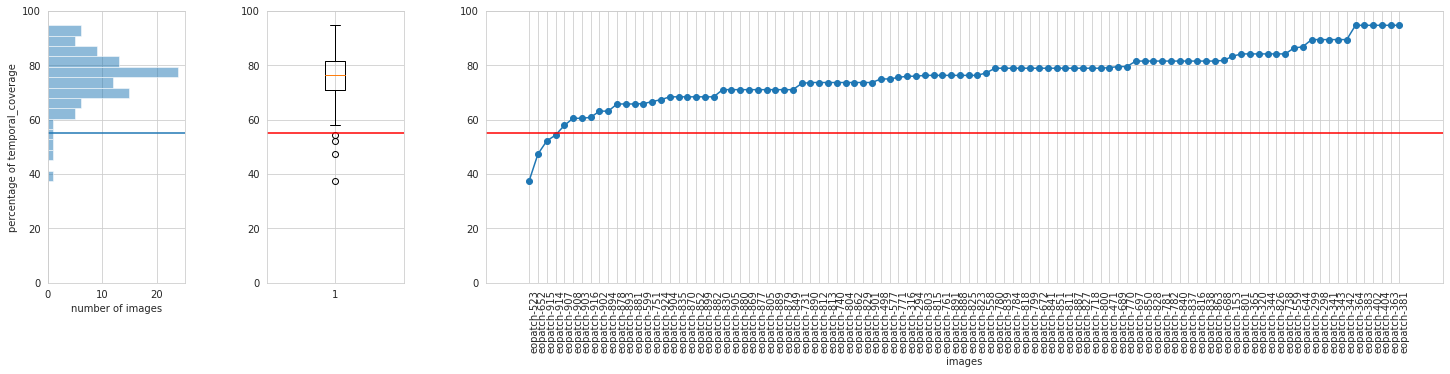

num_timesteps             38.000000
num_timesteps_missing     38.000000
avg_spatial_coverage      65.384370
num_timesteps_abovecov    12.500000
temporal_coverage         55.263158
dtype: float64

In [29]:
plot_coverage_perc(df_stats, "avg_spatial_coverage")

plot_coverage_perc(df_stats, "temporal_coverage")

### Attach metrics results into Coverage

In [13]:
import pandas as pd
from src.coverage_analysis.visualizer import add_topk_column, plot_col_categorization

folder_results = "./ml_results/ai4eo/"

df_metrics_p_patch_train = pd.read_csv(f"{folder_results}/train_preds_patchs.csv", index_col=0)
df_metrics_p_patch_test = pd.read_csv(f"{folder_results}/test_preds_patchs.csv", index_col=0)
df_metrics_p_patch_test.head()

,MCC,ACC
eopatch-298,0.825550,0.964864
eopatch-342,0.826631,0.962379
eopatch-343,0.825348,0.951240
eopatch-381,0.666570,0.917755
eopatch-404,0.737810,0.950077


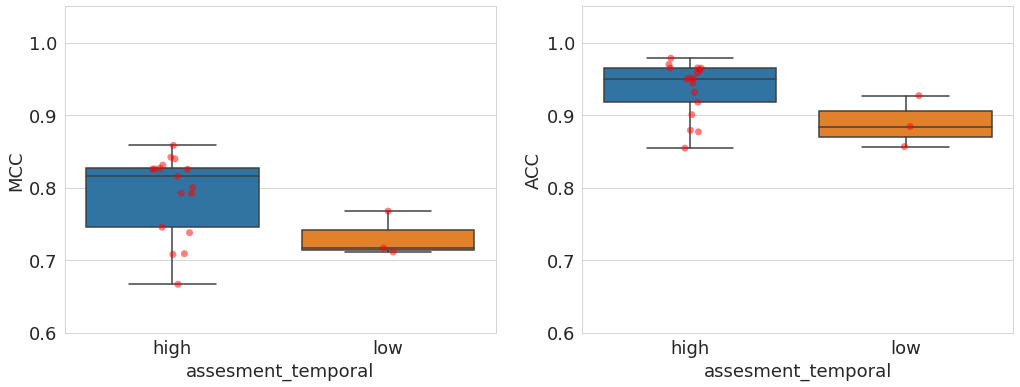

MCC                                                    \
                   count      mean       std       min       25%       50%   
assesment_temporal                                                           
high                17.0  0.790579  0.056251  0.666570  0.745316  0.815547   
low                  3.0  0.731677  0.031182  0.711042  0.713741  0.716440   

                                         ACC                                \
                         75%       max count      mean       std       min   
assesment_temporal                                                           
high                0.826631  0.858167  17.0  0.936374  0.037362  0.854398   
low                 0.741994  0.767548   3.0  0.889201  0.035444  0.856525   

                                                            
                         25%       50%       75%       max  
assesment_temporal                                          
high                0.917755  0.950077  0.964748  0.978436  
low                 0.870360  0.884195  0.905538  0.926882

In [14]:
df_stats_test = df_stats.loc[df_metrics_p_patch_test.index]

df_attached = plot_col_categorization(df_stats_test, df_metrics_p_patch_test, col="assesment_temporal")

> Correlation

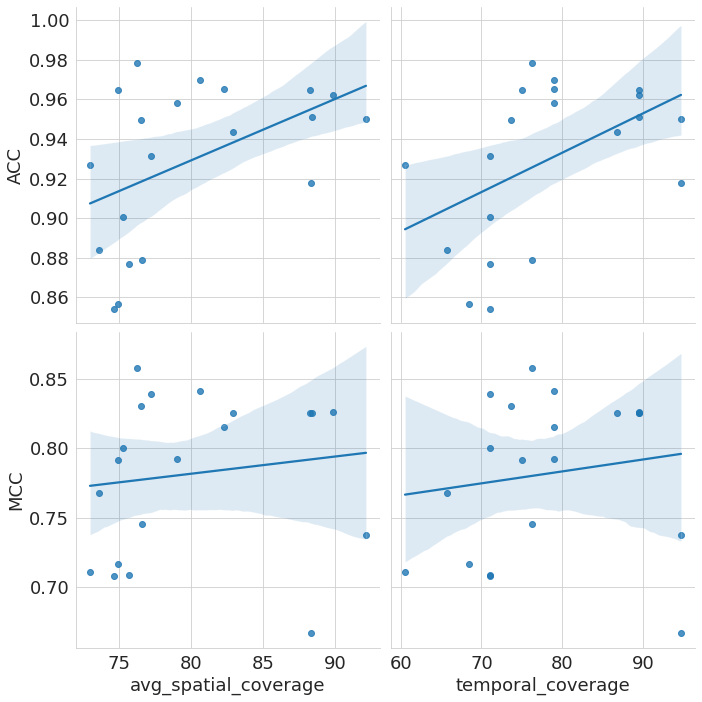

In [44]:
import seaborn as sns
a= sns.pairplot(data=df_attached, x_vars=["avg_spatial_coverage","temporal_coverage"], y_vars=["ACC","MCC"], kind="reg", diag_kind="hist", height=5, markers=['o'])
plt.show()

In [52]:
df_attached.corr()

,num_timesteps,num_timesteps_missing,avg_spatial_coverage,num_timesteps_abovecov,temporal_coverage,MCC,ACC
num_timesteps,1.000000,1.000000,-0.890150,0.924618,-0.785328,0.062733,-0.224663
num_timesteps_missing,1.000000,1.000000,-0.890150,0.924618,-0.785328,0.062733,-0.224663
avg_spatial_coverage,-0.890150,-0.890150,1.000000,-0.670479,0.948281,0.135073,0.478088
num_timesteps_abovecov,0.924618,0.924618,-0.670479,1.000000,-0.494129,0.210840,-0.017823
temporal_coverage,-0.785328,-0.785328,0.948281,-0.494129,1.000000,0.147642,0.483125
MCC,0.062733,0.062733,0.135073,0.210840,0.147642,1.000000,0.703390
ACC,-0.224663,-0.224663,0.478088,-0.017823,0.483125,0.703390,1.000000


### Consideron top-K images

Limit temporal_coverage is 71.05263157894737


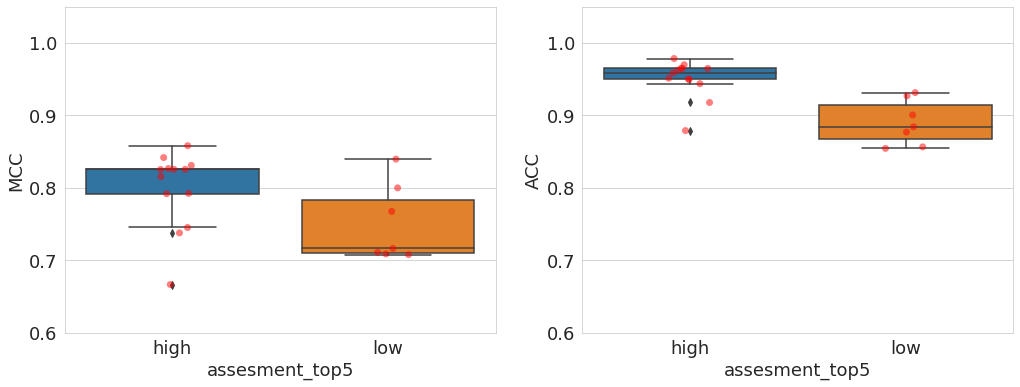

MCC                                                    \
               count      mean       std       min       25%       50%   
assesment_top5                                                           
high            13.0  0.798731  0.053034  0.666570  0.791887  0.825348   
low              7.0  0.750196  0.053150  0.707902  0.709940  0.716440   

                                     ACC                                \
                     75%       max count      mean       std       min   
assesment_top5                                                           
high            0.826631  0.858167  13.0  0.950396  0.026162  0.878999   
low             0.783764  0.839627   7.0  0.890117  0.031027  0.854398   

                                                        
                     25%       50%       75%       max  
assesment_top5                                          
high            0.949551  0.958461  0.964864  0.978436  
low             0.866722  0.884195  0.913702  0.931380

In [11]:
df_stats_test = df_stats.loc[df_metrics_p_patch_test.index]
add_topk_column(df_stats_test, k=5, column="temporal_coverage")

data_attached = plot_col_categorization(df_stats_test, df_metrics_p_patch_test, col="assesment_top5")

In [9]:
data_attached

,num_timesteps,num_timesteps_missing,avg_spatial_coverage,num_timesteps_abovecov,temporal_coverage,assesment_temporal,assesment_spatial,assesment_top5,MCC,ACC
eopatch-298,19,19,88.236884,17,89.473684,high,high,high,0.825550,0.964864
eopatch-342,19,19,89.798232,17,89.473684,high,high,high,0.826631,0.962379
eopatch-343,19,19,88.360000,17,89.473684,high,high,high,0.825348,0.951240
eopatch-381,19,19,88.327832,18,94.736842,high,high,high,0.666570,0.917755
eopatch-404,19,19,92.109389,18,94.736842,high,high,high,0.737810,0.950077
eopatch-577,48,48,74.926333,36,75.000000,high,high,high,0.791887,0.964748
eopatch-644,38,38,82.907663,33,86.842105,high,high,high,0.825554,0.943717
eopatch-672,38,38,80.662358,30,78.947368,high,high,high,0.841769,0.969855
eopatch-718,38,38,82.290063,30,78.947368,high,high,high,0.815547,0.965065
eopatch-740,38,38,76.529895,28,73.684211,high,high,high,0.830981,0.949551


what happened with eopatch-880	??

Limit avg_spatial_coverage is 75.32555789473686


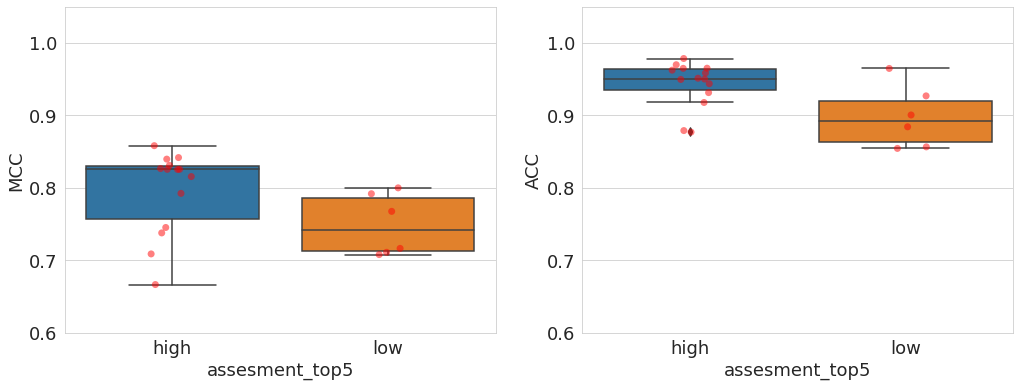

MCC                                                    \
               count      mean       std       min       25%       50%   
assesment_top5                                                           
high            14.0  0.795720  0.057734  0.666570  0.757080  0.825449   
low              6.0  0.749133  0.042361  0.707902  0.712392  0.741994   

                                     ACC                                \
                     75%       max count      mean       std       min   
assesment_top5                                                           
high            0.829894  0.858167  14.0  0.942764  0.031565  0.876919   
low             0.785803  0.799981   6.0  0.897878  0.042679  0.854398   

                                                        
                     25%       50%       75%       max  
assesment_top5                                          
high            0.934465  0.950659  0.964243  0.978436  
low             0.863443  0.892358  0.920292  0.964748

,num_timesteps,num_timesteps_missing,avg_spatial_coverage,num_timesteps_abovecov,temporal_coverage,assesment_temporal,assesment_spatial,assesment_top5,MCC,ACC
eopatch-298,19,19,88.236884,17,89.473684,high,high,high,0.825550,0.964864
eopatch-342,19,19,89.798232,17,89.473684,high,high,high,0.826631,0.962379
eopatch-343,19,19,88.360000,17,89.473684,high,high,high,0.825348,0.951240
eopatch-381,19,19,88.327832,18,94.736842,high,high,high,0.666570,0.917755
eopatch-404,19,19,92.109389,18,94.736842,high,high,high,0.737810,0.950077
eopatch-577,48,48,74.926333,36,75.000000,high,high,low,0.791887,0.964748
eopatch-644,38,38,82.907663,33,86.842105,high,high,high,0.825554,0.943717
eopatch-672,38,38,80.662358,30,78.947368,high,high,high,0.841769,0.969855
eopatch-718,38,38,82.290063,30,78.947368,high,high,high,0.815547,0.965065
eopatch-740,38,38,76.529895,28,73.684211,high,high,high,0.830981,0.949551


In [10]:
df_stats_test = df_stats.loc[df_metrics_p_patch_test.index]
add_topk_column(df_stats_test, k=5, column="avg_spatial_coverage")

plot_col_categorization(df_stats_test, df_metrics_p_patch_test, col="assesment_top5")